<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Аналитика" data-toc-modified-id="Аналитика-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Аналитика</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Чтение и подготовка данных

In [1]:
# подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### query_1.csv

In [2]:
# читаем данные с сервера яндекса
df_model_flights = pd.read_csv('https://code.s3.yandex.net/datasets/query_1.csv')

In [3]:
df_model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
# смотрим наличие дубликатов
df_model_flights.duplicated().sum()

0

In [6]:
df_model_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


Пропусков нет. Размер датасета 8 записей. Дубликатов - нет.

### query_3.csv

In [7]:
# читаем данные с сервера яндекса
df_city_flights = pd.read_csv('https://code.s3.yandex.net/datasets/query_3.csv')

In [8]:
df_city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
df_city_flights.head(5)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [10]:
df_city_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


In [11]:
df_city_flights.isna().sum()

city               0
average_flights    0
dtype: int64

In [12]:
# смотрим наличие дубликатов
df_city_flights.duplicated().sum()

0

Пропусков нет. Размер датасета - 101 запись. дубликатов - нет.

**Вывод: Данные успешно прочитаны. Пропусков и аномалий нет. Дубликаты отсутствуют.**

## Аналитика

### Построим графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

#### Модель самолета и количество рейсов

In [13]:
df_mf = df_model_flights.sort_values(by='flights_amount', ascending=False)
df_mf

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


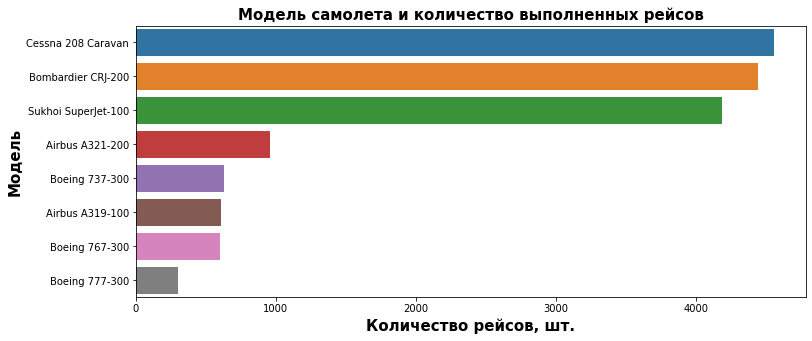

In [14]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y='model', x='flights_amount', data=df_mf)
plt.title("Модель самолета и количество выполненных рейсов",fontsize=15, weight = 'bold')
plt.ylabel('Модель',fontsize=15, weight = 'bold')
plt.xlabel('Количество рейсов, шт.',fontsize=15, weight = 'bold');

Посмотрим в относительных величинах.

In [15]:
df_mf['percent'] = 100 * df_mf['flights_amount']/df_mf['flights_amount'].sum()
df_mf

,model,flights_amount,percent
6,Cessna 208 Caravan,4557,27.982806
5,Bombardier CRJ-200,4446,27.301197
7,Sukhoi SuperJet-100,4185,25.698496
1,Airbus A321-200,960,5.894995
2,Boeing 737-300,630,3.868591
0,Airbus A319-100,607,3.727356
3,Boeing 767-300,600,3.684372
4,Boeing 777-300,300,1.842186


Строим график.

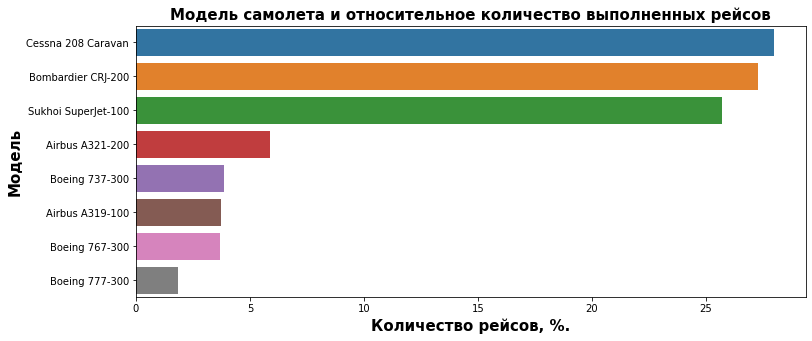

In [16]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y='model', x='percent', data=df_mf)
plt.title("Модель самолета и относительное количество выполненных рейсов",fontsize=15, weight = 'bold')
plt.ylabel('Модель',fontsize=15, weight = 'bold')
plt.xlabel('Количество рейсов, %.',fontsize=15, weight = 'bold');

*Вывод: Наиболее используемые модели самолетов это Cessna 208 Caravan (27.9%), Bombardier CRJ-200 (27.3%) и Sukhoi SuperJet-100 (25.6%)*

#### Города и количество рейсов,

In [17]:
df_cf = df_city_flights.sort_values(by='average_flights', ascending=False)
df_cf

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
...,...,...
22,Ижевск,1.000000
65,Петропавловск-Камчатский,1.000000
31,Комсомольск-на-Амуре,1.000000
58,Нягань,1.000000


Строим график.

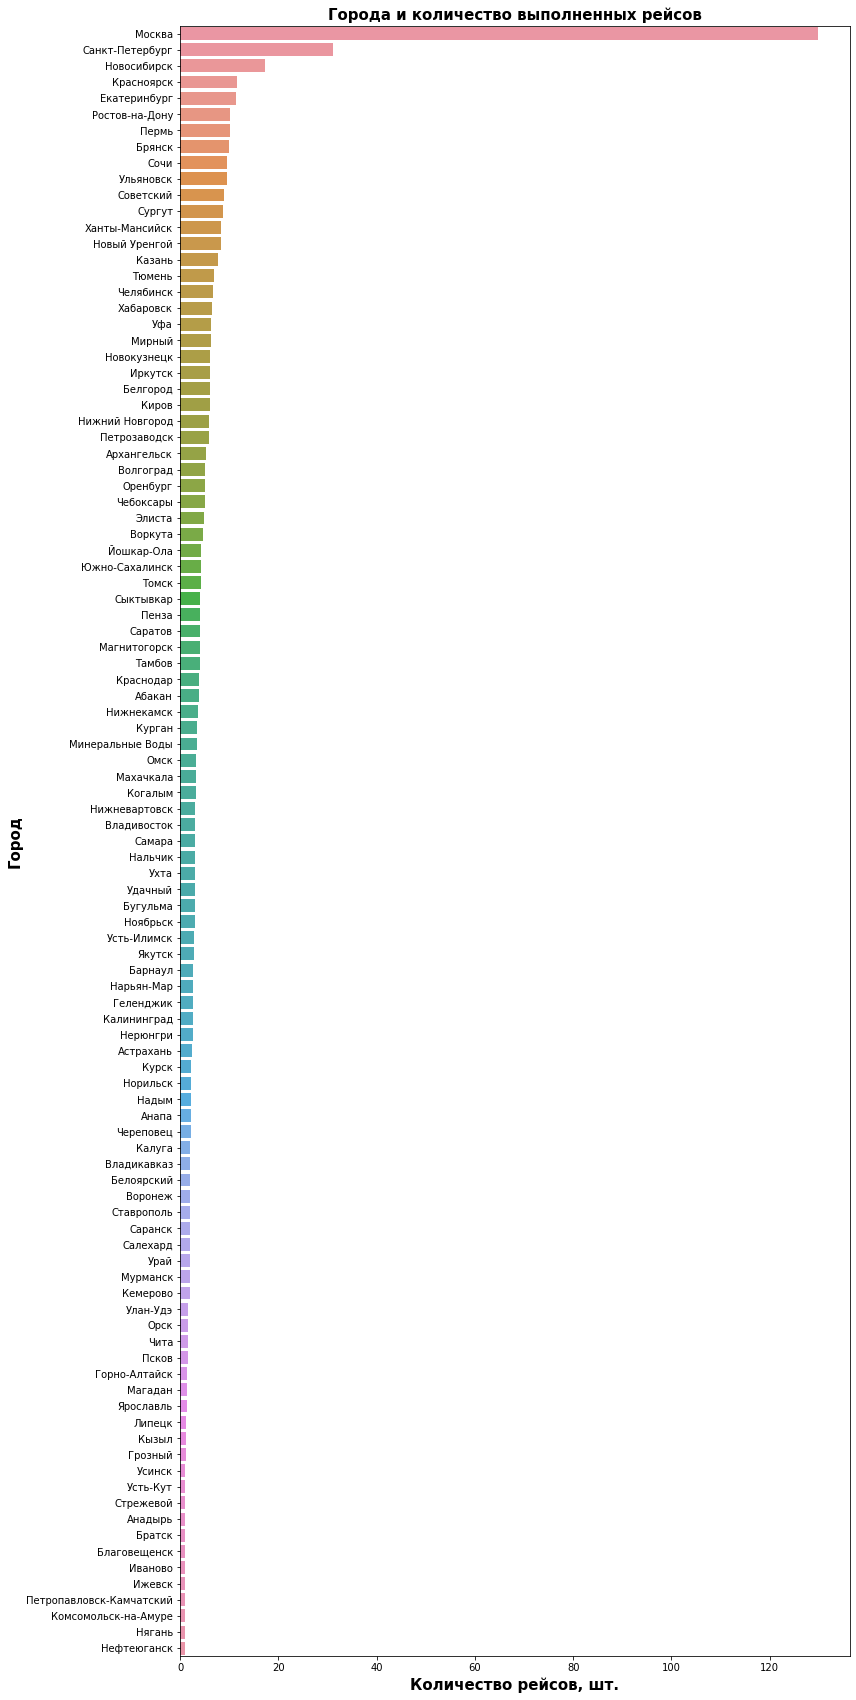

In [18]:
plt.figure(figsize=(12, 30))
ax = sns.barplot(y='city', x='average_flights', data=df_cf)
plt.title("Города и количество выполненных рейсов",fontsize=15, weight = 'bold')
plt.ylabel('Город',fontsize=15, weight = 'bold')
plt.xlabel('Количество рейсов, шт.',fontsize=15, weight = 'bold');

*Вывод: На графике виден огроиный отрыв Москвы по количеству рейсов по сравнениию с регионами.*

#### Выбираем топ-10 городов по количеству рейсов

In [19]:
top_city=df_city_flights.groupby('city')['average_flights'].sum().sort_values(ascending=False).to_frame().reset_index()
top_city.head(10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Расчитаем относительные доли в %.

In [20]:
top_city['percent'] = 100 * top_city['average_flights']/top_city['average_flights'].sum()
top_city.head(10)

,city,average_flights,percent
0,Москва,129.774194,23.386399
1,Санкт-Петербург,31.161290,5.615526
2,Новосибирск,17.322581,3.121674
3,Красноярск,11.580645,2.086929
4,Екатеринбург,11.322581,2.040424
5,Ростов-на-Дону,10.193548,1.836963
6,Пермь,10.129032,1.825337
7,Брянск,10.000000,1.802084
8,Сочи,9.612903,1.732326
9,Ульяновск,9.580645,1.726513


Строим график.

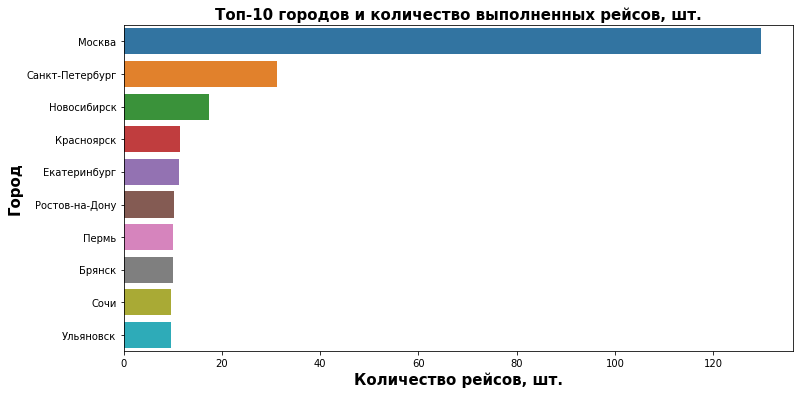

In [21]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='city', x='average_flights', data=top_city.head(10))
plt.title("Топ-10 городов и количество выполненных рейсов, шт.",fontsize=15, weight = 'bold')
plt.ylabel('Город',fontsize=15, weight = 'bold')
plt.xlabel('Количество рейсов, шт.',fontsize=15, weight = 'bold');

График в относительных единицах.

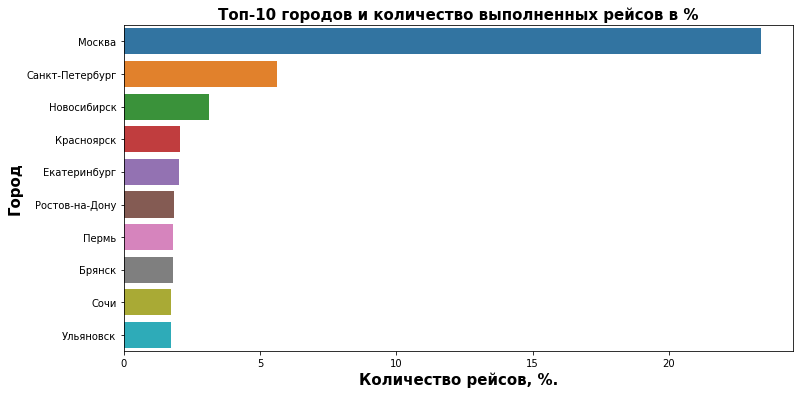

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='city', x='percent', data=top_city.head(10))
plt.title("Топ-10 городов и количество выполненных рейсов в %",fontsize=15, weight = 'bold')
plt.ylabel('Город',fontsize=15, weight = 'bold')
plt.xlabel('Количество рейсов, %.',fontsize=15, weight = 'bold');

*Вывод: Среди топ 10 городов по количеству рейсов лидирует с большим отрывом Москва (23%), затем следует Санкт-Петербург	(5.6%) и Новосибирск (3%)*	

## Выводы

Были изучены предпочтения пользователей, покупающих билеты на разные направления и проанализирован спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

- Выяснено, что с огромным отрвывом лидирует Москва (23%), Санкт-Петербург (5.6%) и Новосибирск (3%). Остальные приблизительно 70% перевозок распределены без явно выраженного лидера по регионам.

- Наиболее используемые модели самолетов это Cessna 208 Caravan (27.9%), Bombardier CRJ-200 (27.3%) и Sukhoi SuperJet-100 (25.6%). Airbus и Boeing для внутренних перевозок используются значительно реже.